Implementing the Ant Colony Optimization (ACO) for the Knapsack Problem
The Ant Colony Optimization (ACO) is a metaheuristic inspired by the behavior of ants searching for food. It is particularly useful for solving combinatorial optimization problems like the Knapsack Problem.

Steps to Implement ACO
Initialize Parameters:
Number of ants, evaporation rate, pheromone levels, etc.
Generate Solutions:
Each ant builds a solution by probabilistically selecting items based on pheromone levels and heuristic information (value-to-weight ratio).
Update Pheromones:
Increase pheromone levels on selected paths based on solution quality.
Apply evaporation to simulate pheromone decay.
Iterate:
Repeat the solution generation and pheromone update for a set number of iterations or until convergence.

Best Solution: [1, 1, 1, 1, 1]
Best Value: 300


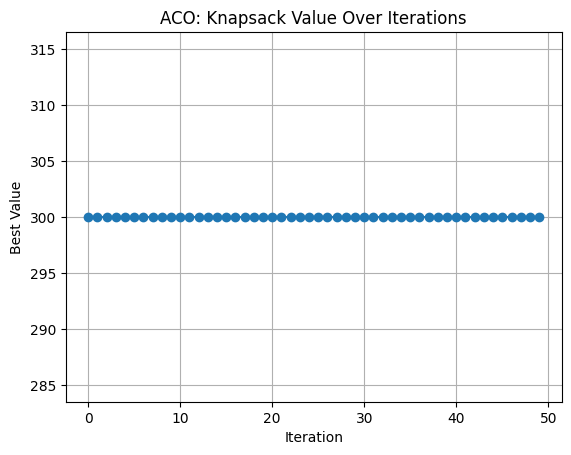

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Input data
items = [
    {"item": 1, "value": 60, "weight": 10},
    {"item": 2, "value": 100, "weight": 20},
    {"item": 3, "value": 120, "weight": 30},
]
knapsack_capacity = 50

# Parameters for ACO
num_ants = 10
num_iterations = 50
pheromone_evaporation = 0.1
pheromone_intensity = 1.0
initial_pheromone = 1.0

# Initialize pheromones
pheromones = np.full(len(items), initial_pheromone)

# Function to calculate the probability of choosing an item
def calculate_probabilities(pheromones, items, capacity_left):
    probabilities = []
    for i, item in enumerate(items):
        if item["weight"] <= capacity_left:
            probabilities.append(pheromones[i] * (item["value"] / item["weight"]))
        else:
            probabilities.append(0)
    total = sum(probabilities)
    return [p / total if total > 0 else 0 for p in probabilities]

# ACO process
best_value = 0
best_solution = []
values_over_time = []

for iteration in range(num_iterations):
    solutions = []
    solution_values = []

    for ant in range(num_ants):
        capacity_left = knapsack_capacity
        solution = []
        value = 0

        while capacity_left > 0:
            probabilities = calculate_probabilities(pheromones, items, capacity_left)
            if sum(probabilities) == 0:
                break
            selected_item = np.random.choice(len(items), p=probabilities)
            if items[selected_item]["weight"] <= capacity_left:
                solution.append(items[selected_item]["item"])
                value += items[selected_item]["value"]
                capacity_left -= items[selected_item]["weight"]

        solutions.append(solution)
        solution_values.append(value)

        if value > best_value:
            best_value = value
            best_solution = solution

    # Update pheromones
    pheromones *= (1 - pheromone_evaporation)
    for solution, value in zip(solutions, solution_values):
        for item in solution:
            pheromones[item - 1] += pheromone_intensity * (value / best_value)

    values_over_time.append(best_value)

# Output results
print("Best Solution:", best_solution)
print("Best Value:", best_value)

# Plotting
plt.plot(values_over_time, marker='o')
plt.title("ACO: Knapsack Value Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Best Value")
plt.grid()
plt.show()


Explanation of the Code
Initialization:

Pheromones are initialized equally for all items.
ACO parameters include the number of ants, iterations, and pheromone update rules.
Ant Solution Construction:

Each ant builds a solution by probabilistically selecting items based on pheromones and heuristic value (value-to-weight ratio).
Capacity constraints are respected.
Pheromone Update:

Pheromones decay slightly in each iteration to simulate evaporation.
High-quality solutions reinforce pheromones on the items included.
Output:

Displays the best solution and its total value.
Graphs the improvement in the best value over iterations.